In [1]:
import os
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_VISIBLE_DEVICES'] = "1"
# os.environ['PATH'] += os.pathsep + '/home/athar/XilinxTools/Vivado/2019.2/bin'
# os.environ['PATH'] += os.pathsep + '/home/athar/XilinxTools/Vitis/2019.2/bin'

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import numpy as np

2024-04-01 16:14:01.067530: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 16:14:01.183589: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 16:14:01.184479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 16:14:02.268002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import matplotlib.pyplot as plt
import math

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
# class Sampling(layers.Layer):
#     def __init__(self):
#         super().__init__()

#     def call(self, inputs):
#         return keras.backend.random_normal(shape=tf.shape(inputs), mean=0.0, stddev=1.0)
    
#     def get_config(self):
#         config = super().get_config()
#         return config
                
class Sampling(layers.Layer):
    def __init__(self, seed=69, mean=0, log_var=0):
        super().__init__()
        self.seed = seed
        self.mean = mean
        self.log_var = log_var

    def call(self, inputs):
        return keras.backend.random_normal(shape=tf.shape(inputs), mean=self.mean, stddev=math.sqrt(math.exp(self.log_var)), seed=self.seed)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "seed": self.seed,
                "mean": self.mean,
                "log_var": self.log_var
            }
        )
        return config
                
               

In [6]:
test_input_dim=32

In [7]:
x_in = Input(shape=(test_input_dim, ))

# test add dense
# x = Dense(16)(x_in)

# x = Sampling()(x_in)
x = Sampling(seed=42, mean=0, log_var=0)(x_in)
# test add dense
# x = Dense(16)(x)

model = Model(inputs=x_in, outputs=x)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 sampling (Sampling)         (None, 32)                0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


2024-04-01 16:14:04.178937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-01 16:14:04.180118: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
import json

In [9]:
import pprint

In [10]:
model_arch = json.loads(model.to_json())
layer_config = model_arch['config']['layers']

In [11]:
pprint.pprint(layer_config)

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': [None, 32],
             'dtype': 'float32',
             'name': 'input_1',
             'ragged': False,
             'sparse': False},
  'inbound_nodes': [],
  'name': 'input_1'},
 {'class_name': 'Sampling',
  'config': {'dtype': 'float32',
             'log_var': 0,
             'mean': 0,
             'name': 'sampling',
             'seed': 42,
             'trainable': True},
  'inbound_nodes': [[['input_1', 0, 0, {}]]],
  'name': 'sampling'}]


In [12]:
# x_test = np.random.rand(1, test_input_dim)
x_test = np.zeros(test_input_dim)

In [13]:
x_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
y_model = model.predict(x_test)

1/1 [==============================] - 0s 84ms/step


In [15]:
print(y_model)

[-0.28077507 -0.1377521  -0.6763296   0.02458041 -0.89358455 -0.82847327
  1.2068944   1.3810157  -1.4557977  -0.24621388 -1.3608406   1.0879604
 -0.3511659  -0.5138534   3.4117208   0.05885482  0.8918024  -0.7528832
 -0.43357283  2.4538531   0.31374422 -0.52736205  0.85249925 -0.5379132
  1.0512363   0.09101018  0.04078108  0.8860364  -0.6597835   2.7017565
  0.94328713  0.14154702]


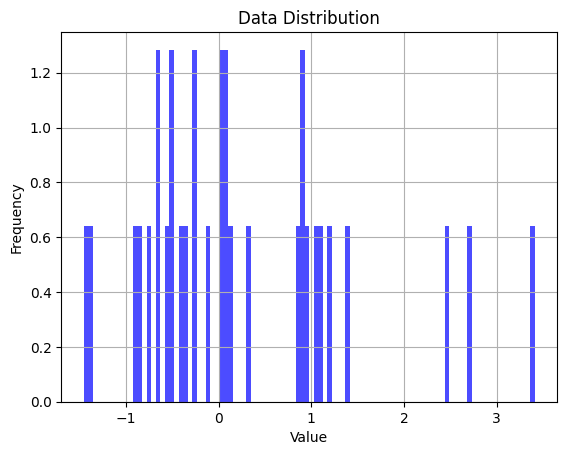

In [16]:
plt.hist(y_model.flatten(), bins=100, density=True, alpha=0.7, color='b')
#plt.plot(data)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Data Distribution')
plt.grid(True)
#plt.savefig("random normal distribution.png")
plt.show()


In [17]:
np.mean(y_model)

0.2463212

In [18]:
np.std(y_model)

1.1210766

In [19]:
np.var(y_model)

1.2568128

# To HLS

In [20]:
import hls4ml

/home/athar/HLS4ML/hls4ml/hls4ml/converters/__init__.py:24: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [21]:
from hls4ml.converters.keras_to_hls import parse_default_keras_layer

In [22]:
# def parse_sampling_layer(keras_layer, input_names, input_shapes, data_reader):
#     assert keras_layer["class_name"] == 'Sampling'

#     layer = parse_default_keras_layer(keras_layer, input_names)
#     #layer = {}
#     layer['class_name'] = 'Sampling'
    
#     # input size same as output size
#     layer['n_elem'] = input_shapes[0][1] #1024
#     # print(f"input_shapes: {input_shapes}") [[None, 1024]]
#     output_shape = [shape for shape in input_shapes[0]]
    
    
#     return layer, output_shape

def parse_sampling_layer(keras_layer, input_names, input_shapes, data_reader):
    assert keras_layer["class_name"] == 'Sampling'

    layer = parse_default_keras_layer(keras_layer, input_names)
    #layer = {}
    layer['class_name'] = 'Sampling'
    
    # input size same as output size
    layer['n_elem'] = input_shapes[0][1] #1024
    # print(f"input_shapes: {input_shapes}") [[None, 1024]]
    output_shape = [shape for shape in input_shapes[0]]

    layer['seed'] = keras_layer['config'].get('seed', 42)
    layer['mean'] = keras_layer['config'].get('mean', 0)
    layer['log_var'] = keras_layer['config'].get('log_var', 0)
    
    return layer, output_shape

In [23]:
# hls4ml layer implementation
class H_Sampling(hls4ml.model.layers.Layer):
    '''hls4ml implementation of a hypothetical custom layer'''

    def initialize(self):
        inp = self.get_input_variable()
        shape = inp.shape
        dims = inp.dim_names
        self.add_output_variable(shape, dims)

In [24]:
#### Normal config ############
# sampling_config_template = """struct config{index} : nnet::sampling_config {{
#     static const unsigned n_elem = {n_elem};
#     typedef ap_fixed<16,4> result_t;
#     typedef ap_int<130> seed_t;
#     static const int seed = {seed};
#     static const unsigned table_size = 1024;
#     static const unsigned exp_range = 10;
#     typedef ap_fixed<18,8> exp_table_t;
#     static constexpr float mean = {mean};
#     static constexpr float log_var = {log_var};
# }};\n
# nnet::GRNGArray<config{index}::n_elem, typename config{index}::result_t, typename config{index}::exp_table_t, config{index}::table_size, config{index}::exp_range> normal{{(config{index}::seed)}};"""

# sampling_function_template = 'nnet::sampling<{input_t}, {output_t}, {config}>({input}, {output}, normal);'
# sampling_include_list = ['nnet_utils/nnet_sampling.h']

####### Mean and var edited ##############
sampling_config_template = """struct config{index} : nnet::sampling_config {{
    static const unsigned n_elem = {n_elem};
    typedef ap_fixed<16,4> result_t;
    static const unsigned table_size = 1024;
    static const unsigned exp_range = 10;
    typedef ap_fixed<18,8> exp_table_t;
    static const int seed = {seed};
}};\n
nnet::GRNGArray<config{index}::n_elem, typename config{index}::result_t, typename config{index}::exp_table_t, config{index}::table_size, config{index}::exp_range> normal{{(config{index}::seed)}};"""

sampling_function_template = 'nnet::sampling<{input_t}, {output_t}, {config}>({input}, {output}, {mean}, {log_var}, normal);'
sampling_include_list = ['nnet_utils/nnet_sampling.h']


class SamplingConfigTemplate(hls4ml.backends.template.LayerConfigTemplate):
    def __init__(self):
        super().__init__(H_Sampling)
        self.template = sampling_config_template

    def format(self, node):
        params = self._default_config_params(node)
        return self.template.format(**params)
    
class SamplingFunctionTemplate(hls4ml.backends.template.FunctionCallTemplate):
    def __init__(self):
        super().__init__(H_Sampling, include_header=sampling_include_list)
        self.template = sampling_function_template

    def format(self, node):
        params = self._default_function_params(node)
        return self.template.format(**params)

In [25]:
# Register the converter for custom Keras layer
hls4ml.converters.register_keras_layer_handler('Sampling', parse_sampling_layer)

In [26]:
# Register the hls4ml's IR layer
hls4ml.model.layers.register_layer('Sampling', H_Sampling)

In [27]:
for backend_id in ['Vivado', 'Quartus', 'VivadoAccelerator']:
    # Register the optimization passes (if any)
    backend = hls4ml.backends.get_backend(backend_id)
    #backend.register_pass('remove_duplicate_reverse', RemoveDuplicateReverse, flow=f'{backend_id.lower()}:optimize')

    # Register template passes for the given backend
    backend.register_template(SamplingConfigTemplate)
    backend.register_template(SamplingFunctionTemplate)

    # Register HLS implementation
    backend.register_source('/home/athar/HLS4ML/GRNG/new_GRNG/nnet_sampling.h')

In [28]:
hls4ml.model.optimizer.passes.qkeras.OutputRoundingSaturationMode.layers = ['Activation']
hls4ml.model.optimizer.passes.qkeras.OutputRoundingSaturationMode.rounding_mode = 'AP_RND_CONV'
hls4ml.model.optimizer.passes.qkeras.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'
config = hls4ml.utils.config_from_keras_model(model, granularity='name', default_precision='ap_fixed<16,4>', default_reuse_factor=4)
config['Model']['Strategy'] = 'Resource'
pprint.pprint(config)  


Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: sampling, layer type: Sampling, input shapes: [[None, 32]], output shape: [None, 32]
{'LayerName': {'input_1': {'Precision': {'result': 'ap_fixed<16,4>'},
                           'Trace': False},
               'sampling': {'Precision': {'result': 'ap_fixed<16,4>'},
                            'Trace': False}},
 'Model': {'BramFactor': 1000000000,
           'Precision': 'ap_fixed<16,4>',
           'ReuseFactor': 4,
           'Strategy': 'Resource',
           'TraceOutput': False}}


In [29]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='./hls_model/Sampling',
                                                       io_type = 'io_stream',
                                                       #backend='VivadoAccelerator', board='pynq-z2')
                                                       part='xc7z020clg400-1',
                                                       backend='Vivado')
hls_model.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: sampling, layer type: Sampling, input shapes: [[None, 32]], output shape: [None, 32]
Creating HLS model
Writing HLS project


Done


In [30]:
y_hls = hls_model.predict(x_test.astype('float32'))

In [31]:
y_hls

array([-0.42358398,  0.44555664, -0.43554688, -0.02197266, -0.8388672 ,
        0.37939453,  0.5671387 ,  0.2512207 ,  1.0339355 , -1.407959  ,
        0.59716797, -1.0229492 ,  2.488037  , -0.92993164, -0.5058594 ,
       -0.9309082 , -1.8552246 , -1.3850098 , -1.3647461 ,  1.4577637 ,
       -0.56689453, -0.23510742,  0.7702637 , -1.6608887 , -0.1550293 ,
       -1.9348145 ,  1.0307617 , -0.02636719, -0.09008789, -0.27612305,
        1.2189941 ,  0.4597168 ], dtype=float32)

In [32]:
np.mean(y_hls)

-0.1677475

In [33]:
np.std(y_hls)

1.018894

In [34]:
np.var(y_hls)

1.0381448

In [35]:
y_hls.shape

(32,)

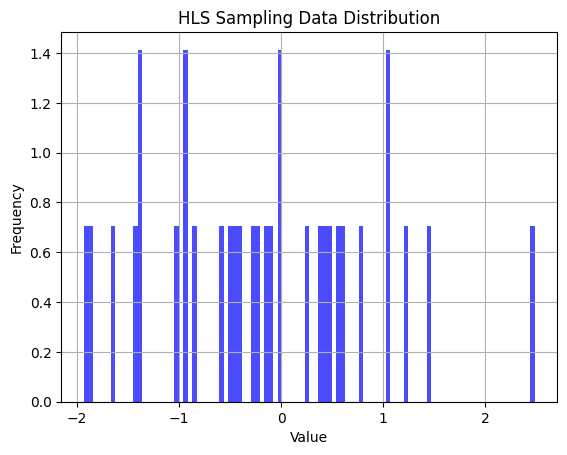

In [36]:
plt.hist(y_hls.flatten(), bins=100, density=True, alpha=0.7, color='b')
#plt.plot(data)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('HLS Sampling Data Distribution')
plt.grid(True)
#plt.savefig("random normal distribution.png")
plt.show()

In [37]:
# with open('srn_multihat.txt', 'w') as f:
#     for val in y_hls:
#         f.write(str(val) + '\n')

In [38]:

# hls_model.build(csim=True, synth=False)
hls_model.build(csim=False, synth=True, vsynth=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/athar/XilinxTools/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/athar/XilinxTools/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'athar' on host 'LenovoSlim' (Linux_x86_64 version 5.15.0-101-generic) on Mon Apr 01 16:14:21 PDT 2024
INFO: [HLS 200-10] On os Ubuntu 22.04.3 LTS
INFO: [HLS 200-10] In directory '/home/athar/HLS4ML/GRNG/new_GRNG/hls_model/Sampling'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/athar/HLS4ML/GRNG/new_GRNG/hls_model/Sampling/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
I

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.213',
  'BestLatency': '2',
  'WorstLatency': '2',
  'IntervalMin': '1',
  'IntervalMax': '1',
  'FF': '15078',
  'LUT': '16827',
  'BRAM_18K': '0',
  'DSP': '0',
  'URAM': '0',
  'AvailableBRAM_18K': '280',
  'AvailableDSP': '220',
  'AvailableFF': '106400',
  'AvailableLUT': '53200',
  'AvailableURAM': '0'}}